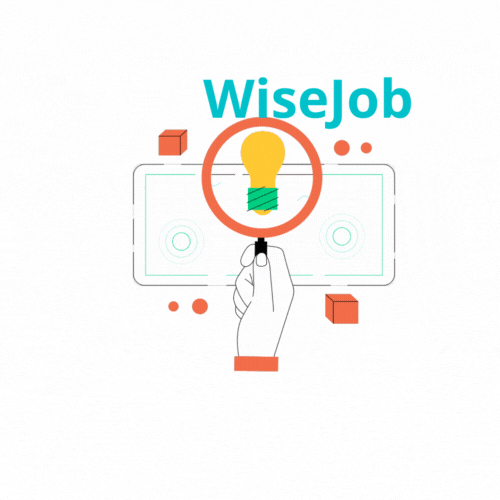

# Sistema de priorización del aprendizaje

In [1]:
# Importación de librerías

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import combinations

%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Cargar el dataset preprocesado
df = pd.read_csv('dataset.csv', sep=',')
del df['Unnamed: 0']

df.head()

,Job Title,Salary Estimate,Job Description,Rating,Location,Headquarters,Size,scope,javascript,python,...,redshift,bigquery,mysql,snowflake,qliksense,altair,databricks,dataiku,h2o.ai,salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,"New York, NY","New York, NY",201 to 500 employees,DataAnalyst,False,True,...,False,False,False,False,False,False,False,False,False,51.5
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,"New York, NY","New York, NY",10000+ employees,DataAnalyst,False,False,...,False,False,False,False,False,False,False,False,False,51.5
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,"New York, NY","New York, NY",1001 to 5000 employees,DataAnalyst,False,True,...,False,False,False,False,False,False,False,False,False,51.5
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,"New York, NY","McLean, VA",201 to 500 employees,DataAnalyst,False,False,...,False,False,False,False,False,False,False,False,False,51.5
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,"New York, NY","New York, NY",501 to 1000 employees,DataAnalyst,False,True,...,False,False,False,False,False,False,False,False,False,51.5


In [3]:
# Eliminar los valores de rating negativo
df.drop(df[(df['Rating'] < 0)].index, inplace=True)

In [4]:
df.shape

(7757, 89)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7757 entries, 0 to 8667
Data columns (total 89 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Title         7757 non-null   object 
 1   Salary Estimate   7757 non-null   object 
 2   Job Description   7757 non-null   object 
 3   Rating            7757 non-null   float64
 4   Location          7757 non-null   object 
 5   Headquarters      7757 non-null   object 
 6   Size              7757 non-null   object 
 7   scope             7757 non-null   object 
 8   javascript        7757 non-null   bool   
 9   python            7757 non-null   bool   
 10   r                7757 non-null   bool   
 11   go               7757 non-null   bool   
 12  php               7757 non-null   bool   
 13  c#                7757 non-null   bool   
 14  ruby              7757 non-null   bool   
 15  c++               7757 non-null   bool   
 16  html              7757 non-null   bool   


The **describe** method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [6]:
df.describe()

,Rating,salary
count,7757.000000,7757.000000
mean,3.783525,97.117249
std,0.632394,36.652826
min,1.000000,33.500000
25%,3.400000,68.500000
50%,3.800000,92.000000
75%,4.100000,122.000000
max,5.000000,225.000000


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the *include* parameter.

In [7]:
df.describe(include=['object', 'bool'])

,Job Title,Salary Estimate,Job Description,Location,Headquarters,Size,scope,javascript,python,r,...,onbase,redshift,bigquery,mysql,snowflake,qliksense,altair,databricks,dataiku,h2o.ai
count,7757,7757,7757,7757,7757,7757,7757,7757,7757,7757,...,7757,7757,7757,7757,7757,7757,7757,7757,7757,7757
unique,3662,313,6258,316,756,8,3,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Data Engineer,$93K-$151K (Glassdoor est.),Organization: Accenture Federal Services\n\nLo...,"New York, NY","New York, NY",10000+ employees,DataScientist,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,623,59,15,698,649,1919,3483,7250,4088,7301,...,7754,7302,7586,7385,7386,7713,7753,7609,7753,7745


In [8]:
print("Salario medio: "+ str (df['salary'].mean())) 
print("Rating medio: " + str (df['Rating'].mean()))
print("Mediana del salario: " + str (df['salary'].median()))
print("Mediana del rating: " + str (df['Rating'].median()))

Salario medio: 97.1172489364445
Rating medio: 3.783524558463319
Mediana del salario: 92.0
Mediana del rating: 3.8


Text(0, 0.5, 'Frecuencia')

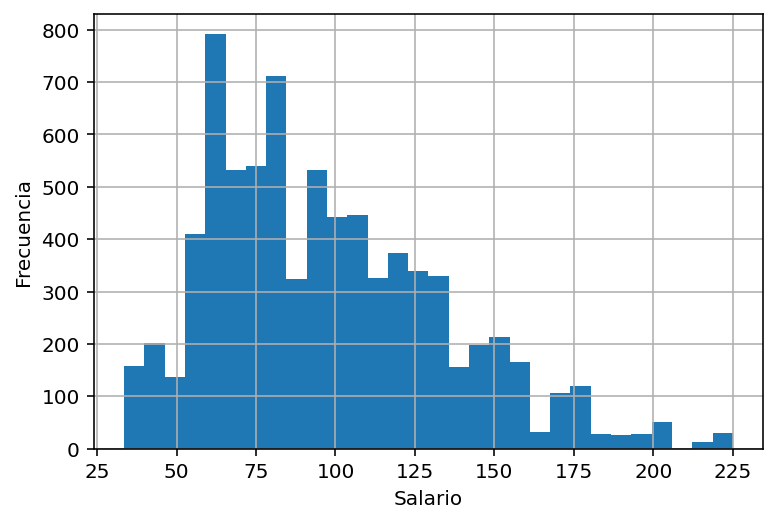

In [9]:
df['salary'].hist(bins=30);
plt.xlabel("Salario")
plt.ylabel("Frecuencia")

In [10]:
from scipy import stats

deciles = np.arange(1, 10) * 10
deciles_dist = [np.percentile(df['salary'], dec) for dec in deciles]

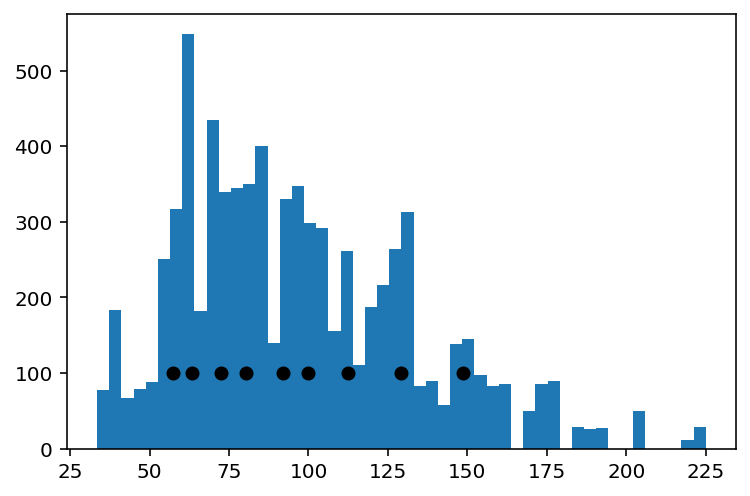

In [11]:
plt.hist(df['salary'], 50)
y = np.repeat(100,9) 
plt.plot(deciles_dist, y, 'ko')
plt.show()

Text(0, 0.5, 'Frecuencia')

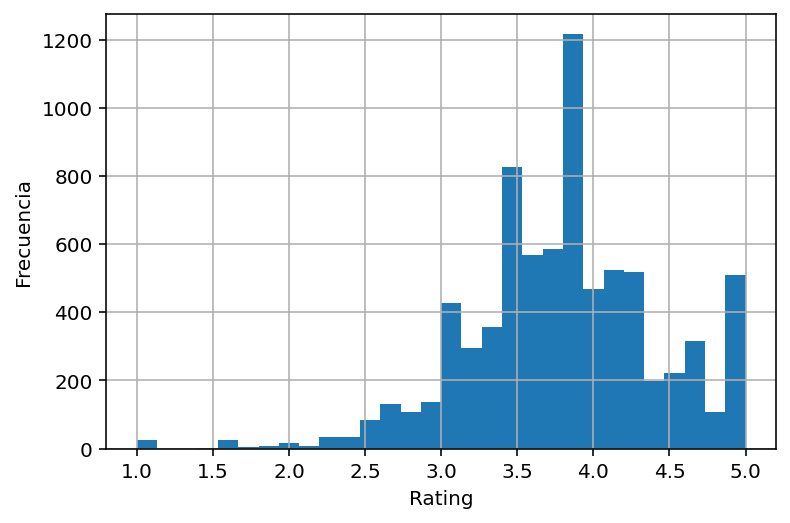

In [12]:
df['Rating'].hist(bins=30);
plt.xlabel("Rating")
plt.ylabel("Frecuencia")

In [13]:
df_BestJobs=df[(df['salary'] > 92) 
   & (df['Rating'] == 3.8)]

In [14]:
df_BestJobs.describe()

,Rating,salary
count,2.830000e+02,283.000000
mean,3.800000e+00,125.561837
std,1.957454e-14,27.134853
min,3.800000e+00,92.500000
25%,3.800000e+00,104.000000
50%,3.800000e+00,121.500000
75%,3.800000e+00,136.500000
max,3.800000e+00,225.000000


In [15]:
for (lugar, sub_dataframe) in df.groupby('Location'):
    print("Location: ", lugar)
    
    print('Median salary')
    print(sub_dataframe['salary'].median())

Location:  Addison, TX
Median salary
76.25
Location:  Alachua, FL
Median salary
42.0
Location:  Alameda, CA
Median salary
60.5
Location:  Alhambra, CA
Median salary
56.5
Location:  Allegheny West, PA
Median salary
71.5
Location:  Allen, TX
Median salary
68.5
Location:  Alvin, TX
Median salary
132.5
Location:  Ambler, PA
Median salary
80.75
Location:  American Fork, UT
Median salary
36.5
Location:  Anaheim, CA
Median salary
99.5
Location:  Arcadia, CA
Median salary
122.5
Location:  Arlington Heights, IL
Median salary
77.5
Location:  Arlington, TX
Median salary
68.5
Location:  Athens, GA
Median salary
44.0
Location:  Aurora, CO
Median salary
78.5
Location:  Austin, TX
Median salary
99.5
Location:  Azusa, CA
Median salary
73.0
Location:  Bala Cynwyd, PA
Median salary
122.0
Location:  Baytown, TX
Median salary
104.5
Location:  Bedford, TX
Median salary
61.5
Location:  Beech Grove, IN
Median salary
47.5
Location:  Bellaire, TX
Median salary
104.5
Location:  Bellevue, WA
Median salary
51.0
L

In [16]:
df['Location'].nunique()

316

In [17]:
import numpy as np
df_location_salary = df.groupby('Location')['salary'].agg([np.mean, np.median, np.alen])

In [18]:
df_location_salary.describe()

,mean,median,alen
count,316.000000,316.000000,316.000000
mean,89.409830,88.052215,24.547468
std,28.425085,29.299169,83.943108
min,36.500000,36.500000,1.000000
25%,70.187500,68.437500,1.000000
50%,85.319444,82.500000,3.000000
75%,106.000000,104.625000,8.000000
max,205.000000,205.000000,698.000000


In [19]:
df_location_salary.sort_values(by=['alen'],inplace=True)

In [20]:
df_location_salary.tail(20)

,mean,median,alen
Location,,,
"Sunnyvale, CA",135.060976,140.5,82.0
"Tempe, AZ",90.678571,91.5,98.0
"San Francisco, CA",99.426471,92.5,102.0
"Santa Clara, CA",148.561404,153.5,114.0
"Plano, TX",90.632231,87.5,121.0
"Fort Worth, TX",80.517857,72.5,140.0
"San Jose, CA",143.664634,143.0,164.0
"Columbus, OH",87.523952,83.5,167.0
"Jacksonville, FL",66.173295,60.5,176.0


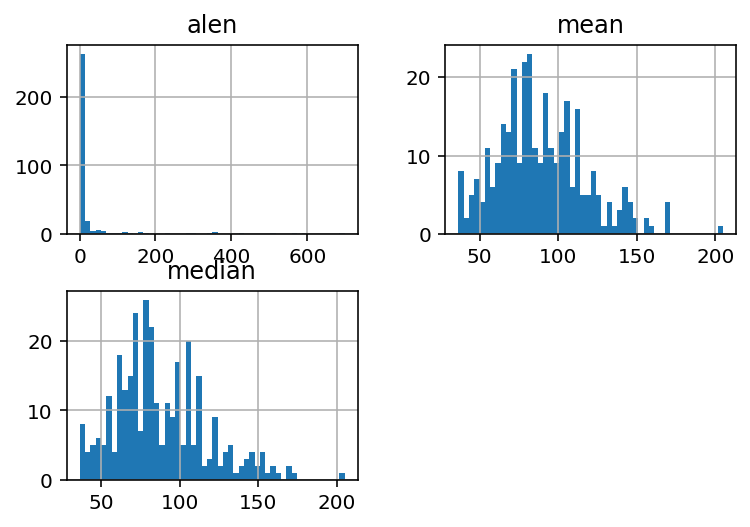

In [21]:
df_location_salary.hist(bins=50);

In [22]:
ciudades=['Philadelphia, PA','San Antonio, TX','Houston, TX','San Diego, CA','Austin, TX','Chicago, IL','New York, NY']

d={}

for city in ciudades:
    d[city]=pd.DataFrame()


for city in d:
    print(df[df.Location == city])
    d[city]=df[df.Location == city]


                                  Job Title              Salary Estimate  \
1070                       Sr. Data Analyst   $41K-$78K (Glassdoor est.)   
1071                           Data Analyst   $41K-$78K (Glassdoor est.)   
1072                           Data Analyst   $41K-$78K (Glassdoor est.)   
1076                           Data Analyst   $41K-$78K (Glassdoor est.)   
1077                    Junior Data Analyst   $41K-$78K (Glassdoor est.)   
...                                     ...                          ...   
6702                    Senior Data Analyst  $55K-$101K (Glassdoor est.)   
6704                 Research Scientist CNS  $55K-$101K (Glassdoor est.)   
6705   Associate Scientist, QC Microbiology  $55K-$101K (Glassdoor est.)   
6707  Data Engineer - PySpark/Spark-SQL/AWS  $55K-$101K (Glassdoor est.)   
6708               Data Analytics Architect  $55K-$101K (Glassdoor est.)   

                                        Job Description  Rating  \
1070  Position Overv

In [23]:
def printHistograms(data, titulo, ejex):
    sns.set_style("white") 
    sns.set_context("paper", font_scale = 5, rc = {"lines.linewidth": 2})
    data.plot.hist(alpha = 0.85, width = 5)
    sns.despine()
    plt.legend()
    plt.title(titulo)
    plt.xlabel(ejex)
    plt.xlim([0,200])

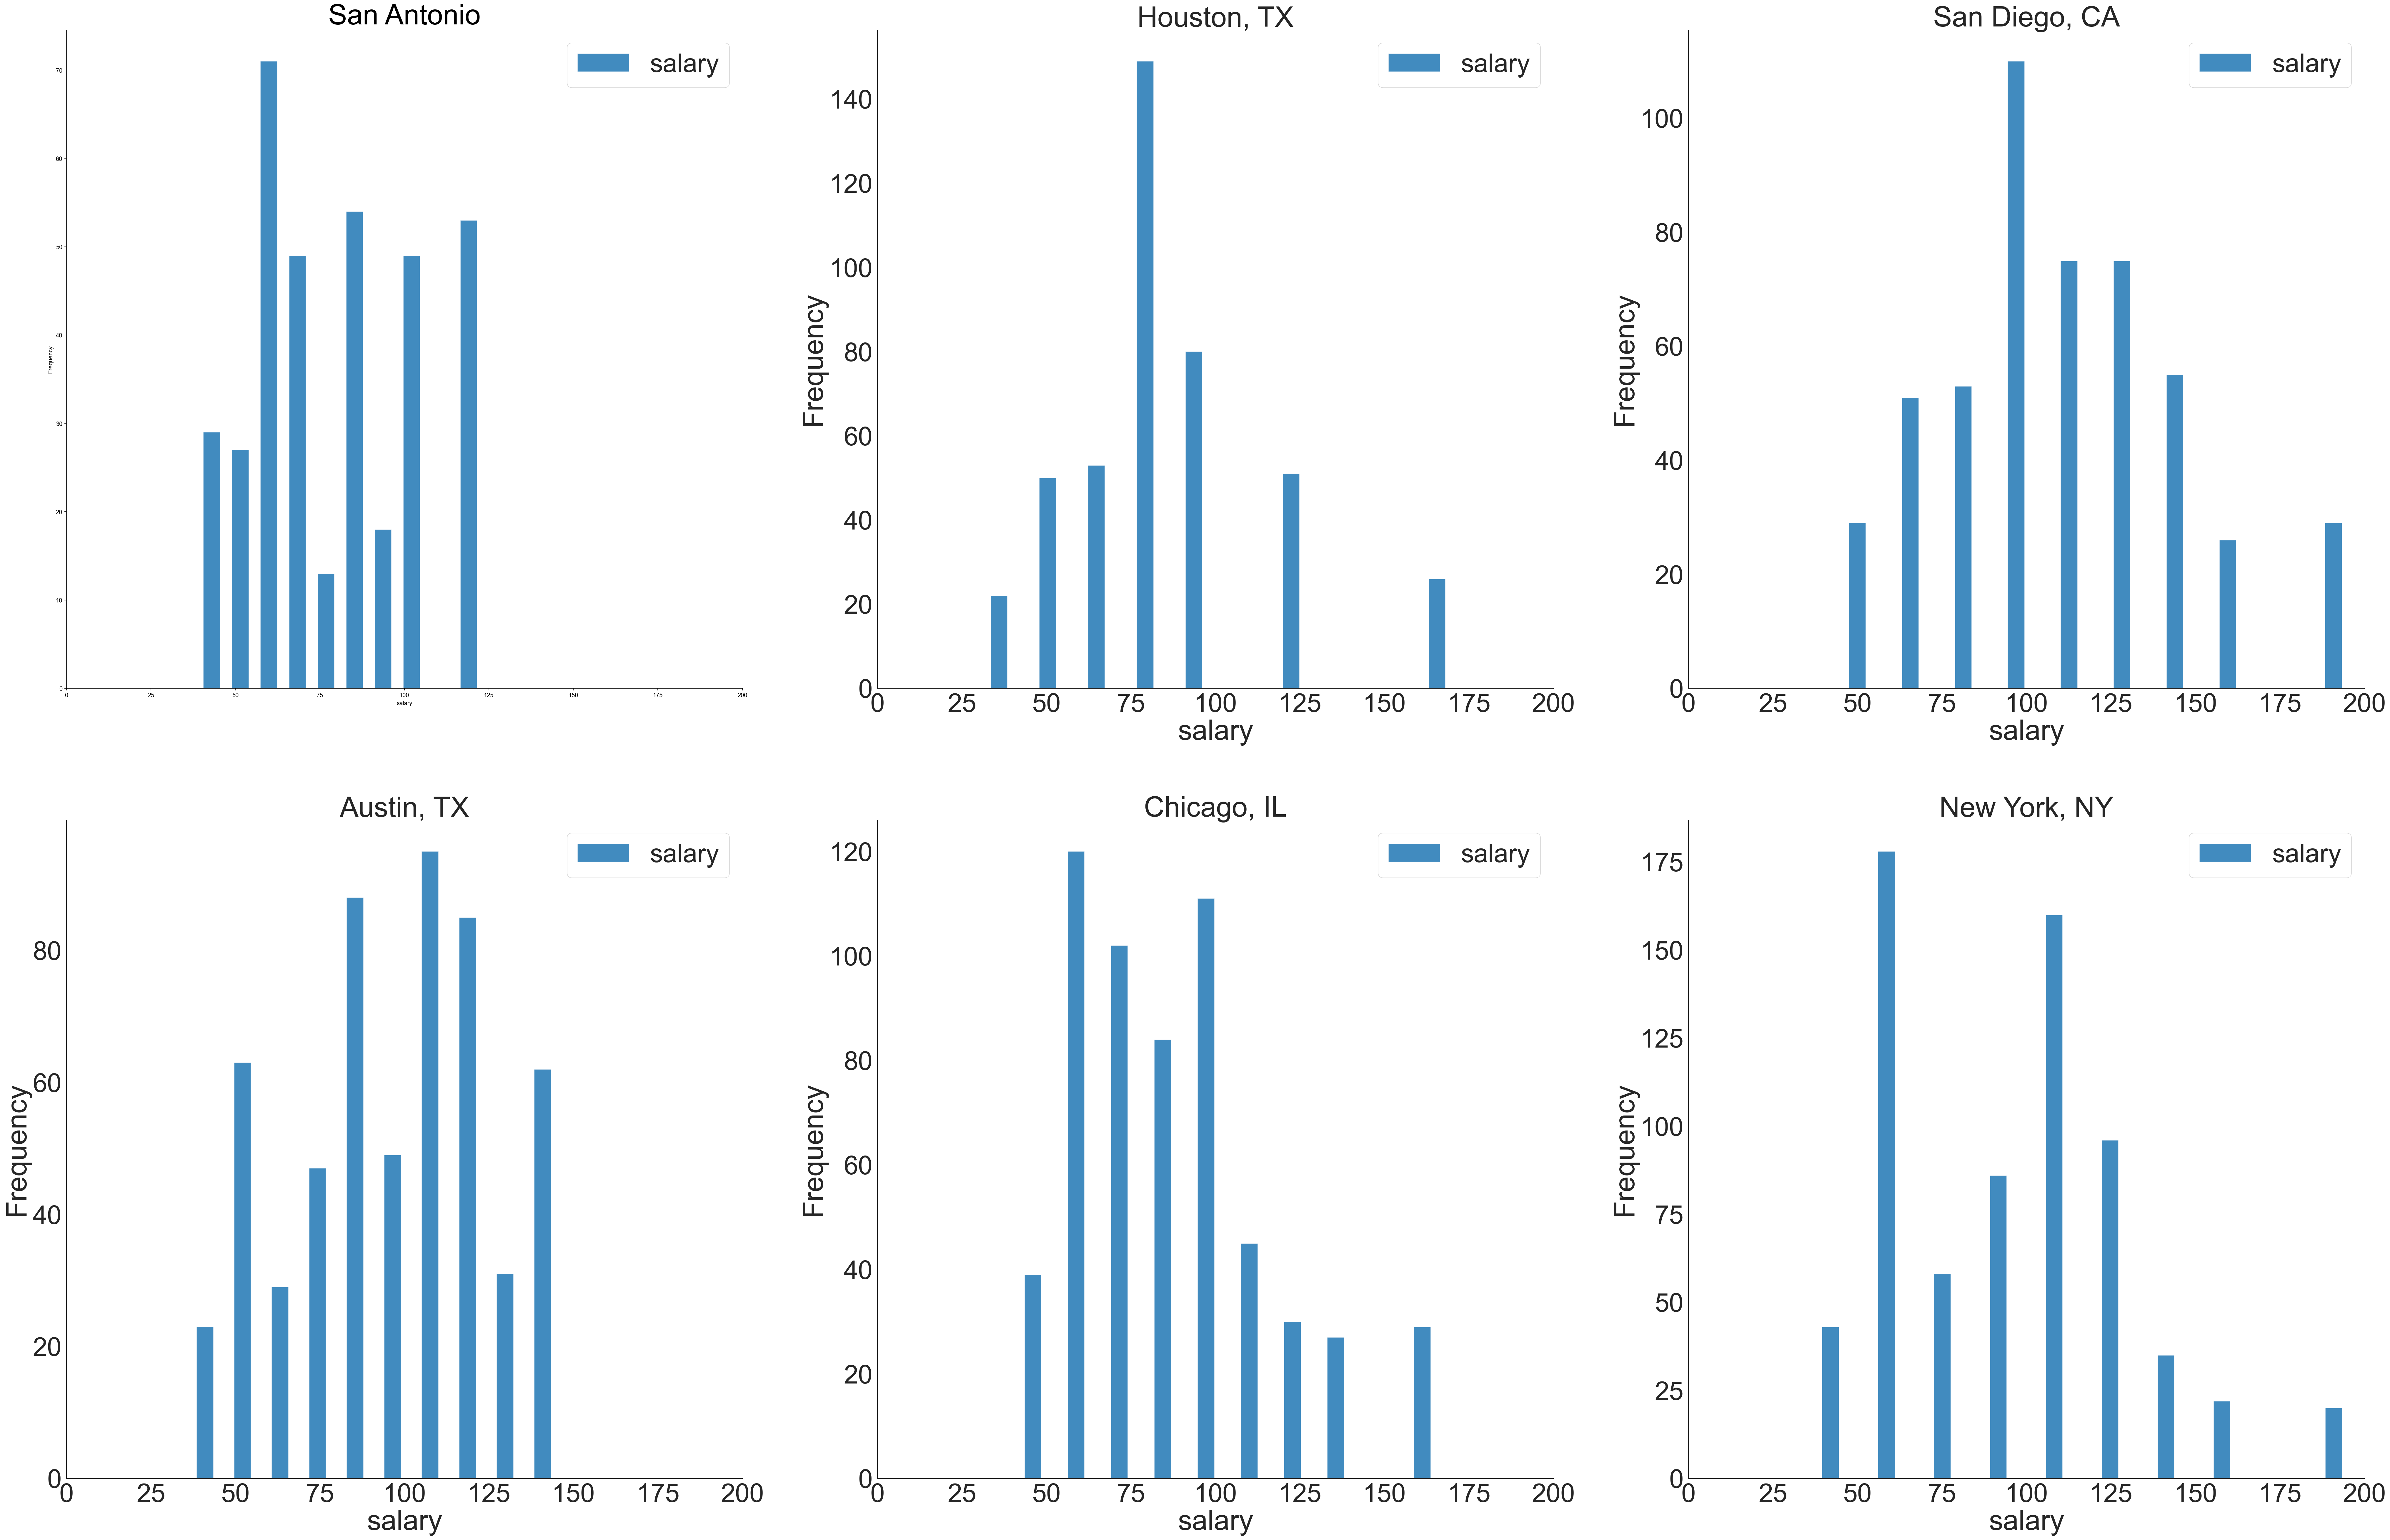

In [24]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize = (70, 70)) ##50,25
gs = GridSpec(nrows = 3, ncols = 3)
# fig.add_subplot(gs[0, 0])
# printHistograms(d['Philadelphia, PA']['salary'], "Philadelphia", "salary")
fig.add_subplot(gs[0, 0])
printHistograms(d['San Antonio, TX']['salary'], "San Antonio", "salary")
fig.add_subplot(gs[0, 1])
printHistograms(d['Houston, TX']['salary'], "Houston, TX", "salary")
fig.add_subplot(gs[0, 2])
printHistograms(d['San Diego, CA']['salary'], 'San Diego, CA', "salary")
fig.add_subplot(gs[1, 0])
printHistograms(d['Austin, TX']['salary'], 'Austin, TX', "salary")
fig.add_subplot(gs[1, 1])
printHistograms(d['Chicago, IL']['salary'], 'Chicago, IL', "salary")
fig.add_subplot(gs[1, 2])
printHistograms(d['New York, NY']['salary'], 'New York, NY', "salary")
plt.show()